# Finance Project: Deep Neural Network

## Supervised machine learning algorithm using Lending Club dataset.

# Project Objective: 
### To develop a supervised machine learning model in order to identify which borrowers will payoff their loans. The project implications can be beneficial to the financial institute in risk assessments, whether the prospective borrower would default or payoff the loan. This can be used to identify a strategy for loan approval and profitable target market. Ultimately, this model serves as the blueprint to decrease bussiness risks and increase profitability of the organization.

# Predictive Model: Deep Neural Network
### Real life dataset by one of the financial powerhouses, Lending Club. Supervised machine learning deep neural network will be used to perform binary classification. In this project, the target feature or y-variable will be "Loan Status".  

# Process:
### This project will start off with exploratory data analysis, data visualization, feature-engineering, and preparing the dataset for machine learning. The end result is the accuracy of the model to predict payoff or default loan. 

### Importing libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
data = pd.read_csv("lending_club_loan_two.csv", engine='python')

In [112]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16,0,36369,41.8,25,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17,0,20131,53.3,27,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13,0,11987,92.2,26,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6,0,5472,21.5,13,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13,0,24584,69.8,43,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [113]:
data.shape

(396029, 27)

### This is a large dataset, which has ~396000 observations having float and object data type. 

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396029 entries, 0 to 396028
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396029 non-null  int64  
 1   term                  396029 non-null  object 
 2   int_rate              396029 non-null  float64
 3   installment           396029 non-null  float64
 4   grade                 396029 non-null  object 
 5   sub_grade             396029 non-null  object 
 6   emp_title             373102 non-null  object 
 7   emp_length            377728 non-null  object 
 8   home_ownership        396029 non-null  object 
 9   annual_inc            396029 non-null  float64
 10  verification_status   396029 non-null  object 
 11  issue_d               396029 non-null  object 
 12  loan_status           396029 non-null  object 
 13  purpose               396029 non-null  object 
 14  title                 394274 non-null  object 
 15  

### Visualizing loan payoff vs chargeoff. 

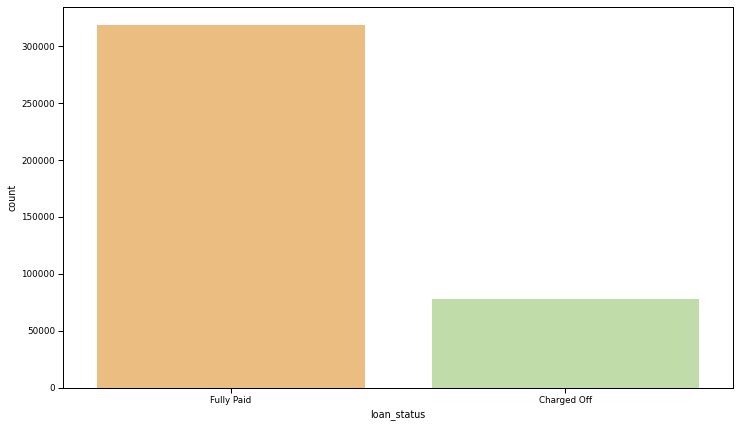

In [115]:
plt.figure(figsize=(12,7))
sns.set_context("paper")
sns.countplot(x="loan_status", data=data, palette="Spectral")

### Visualizing the distribution of loan amount borrowed.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


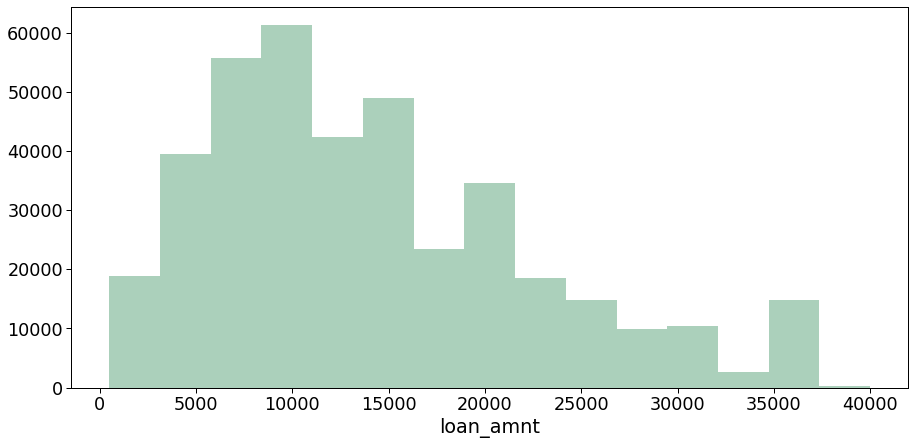

In [116]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sns.distplot(data["loan_amnt"], bins=15, kde=False, color="seagreen")

### Descriptive analysis and correlation of features. 

In [117]:
data.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077780,0.328320,0.099912,0.223886,0.222314,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056772,0.079038,0.011649,0.060986,-0.011280,0.293663,-0.036405,-0.082585,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123916,0.202429,0.193694,-0.098628
annual_inc,0.336887,-0.056772,0.330381,1.000000,-0.081685,0.136151,-0.013720,0.299773,0.027874,0.193023,0.236320,-0.050163
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017638,0.063572,0.088374,0.102129,-0.025438,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136151,0.136181,1.000000,-0.018392,0.221192,-0.131421,0.680728,0.109205,-0.027732
pub_rec,-0.077780,0.060986,-0.067892,-0.013720,-0.017638,-0.018392,1.000000,-0.101664,-0.075909,0.019722,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063572,0.221192,-0.101664,1.000000,0.226348,0.191616,0.194925,-0.124532
revol_util,0.099912,0.293663,0.123916,0.027874,0.088374,-0.131421,-0.075909,0.226348,1.000000,-0.104272,0.007518,-0.086750
total_acc,0.223886,-0.036405,0.202429,0.193023,0.102129,0.680728,0.019722,0.191616,-0.104272,1.000000,0.381072,0.042035


### Noted that loan amount and interest rate has high correlation, which is expected. Total account & open account also has high correlation. Lastly, public record and bankcruptcies, which also makes sense. 

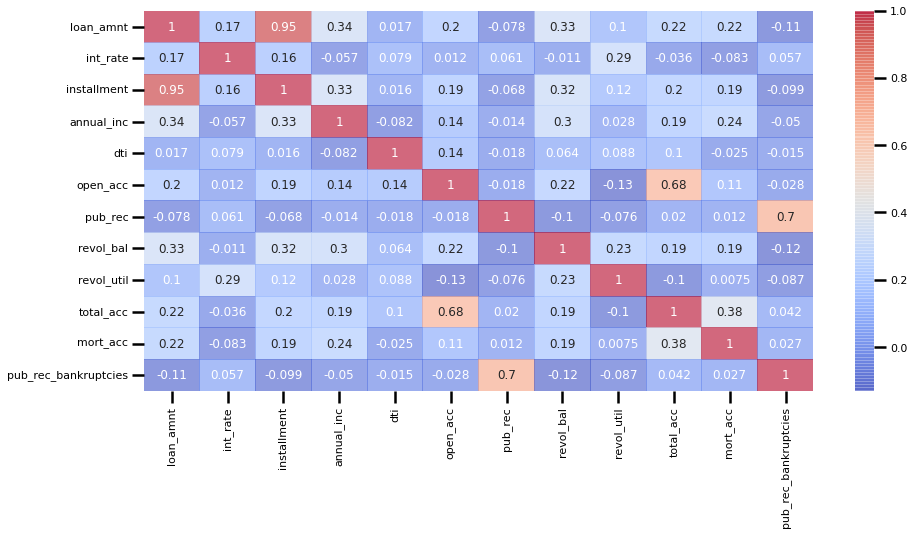

In [118]:
plt.figure(figsize=(15,7))
sns.set_context("poster", font_scale=0.5)
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", alpha=0.6)

### Visualizing the relationship between installment and loan amount.

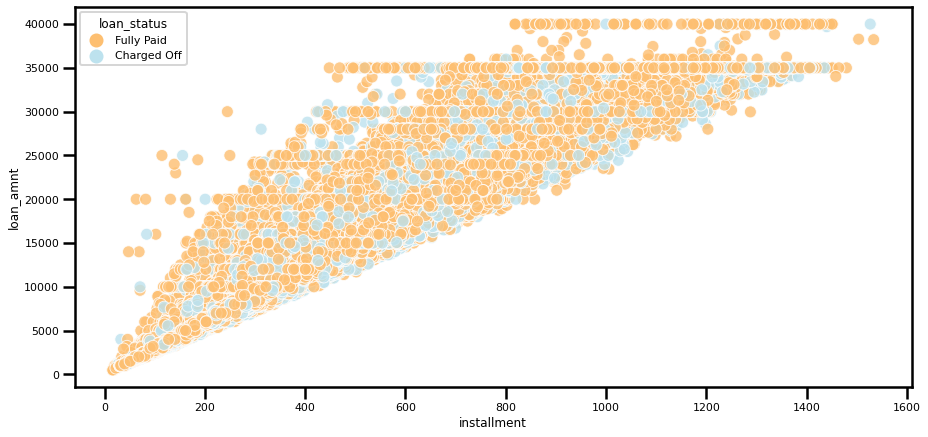

In [119]:
plt.figure(figsize=(15,7))
sns.scatterplot(x="installment", y="loan_amnt", data=data, alpha=0.8, hue="loan_status", palette="RdYlBu" )

### Noted that there is only a slight difference in full paid and charged off on loan amount. 

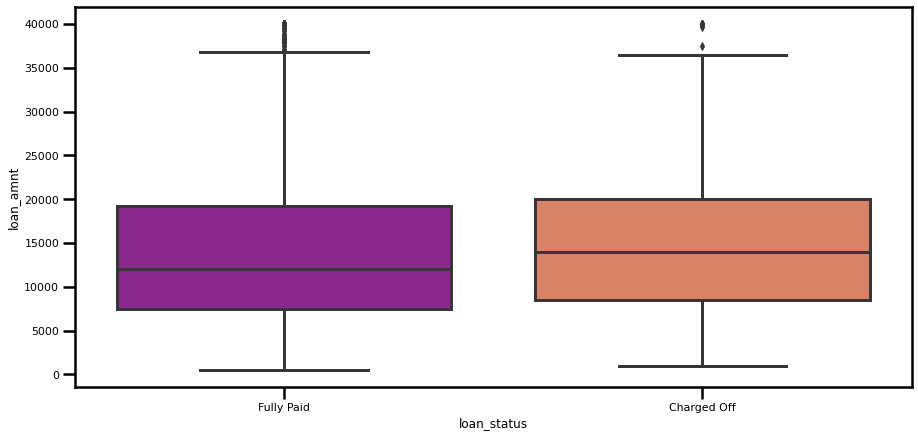

In [120]:
plt.figure(figsize=(15,7))
sns.boxplot(x="loan_status", y="loan_amnt", data=data, palette="plasma")

In [121]:
data.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318356.0,13866.884635,8302.332079,500.0,7500.0,12000.0,19225.0,40000.0


### Diving in the feature "grade", presumably the level of worthiness of the borrowers. 

In [122]:
data["grade"].value_counts()

B    116017
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: grade, dtype: int64

### Visualizing the relationship between the grade and loan status. As expected, borrowers tend to have a higher charged off in lower grade categories. This shows that the grade can potentially be a good indicator if the borrower has the ability to payoff or default.  

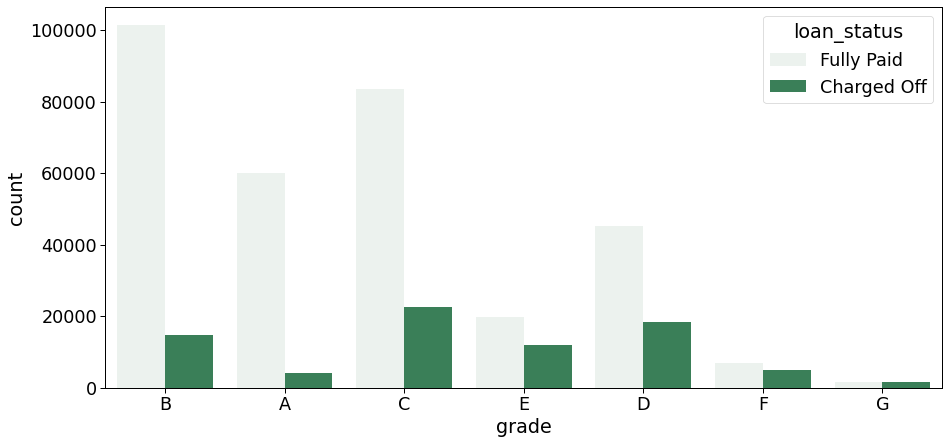

In [123]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sns.countplot(x="grade", data=data, hue="loan_status", color="seagreen")

### Visualizing in a sorted order of grade gives a better understanding of the impact of grade in loan status. The lower the grade, the higher the ratio in fully paid to charged off.

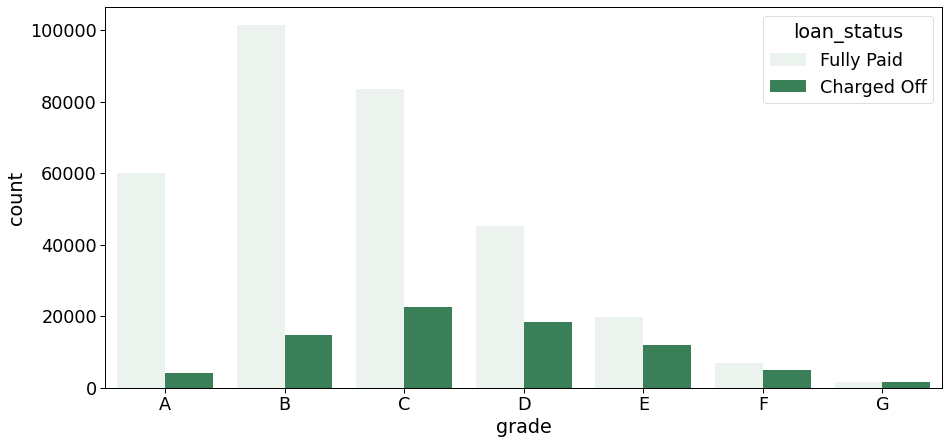

In [124]:
plt.figure(figsize=(15,7))
sns.set_context("paper", font_scale=2)
sorted_grade = sorted(data["grade"].unique())
sns.countplot(x="grade", data=data, hue="loan_status", color="seagreen", order=sorted_grade)

In [125]:
data["loan_status"].value_counts()

Fully Paid     318356
Charged Off     77673
Name: loan_status, dtype: int64

In [126]:
data["loan_repaid"] = data["loan_status"].map({"Fully Paid":1, "Charged Off":0})

In [127]:
data[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396024,1,Fully Paid
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid


### Visualizing the correlation between "loan repaid" and other features. Noted that interest rate has relatively high correlation compared to the rest. This is expected as the higher the interest rate, the harder it is to pay off a loan.

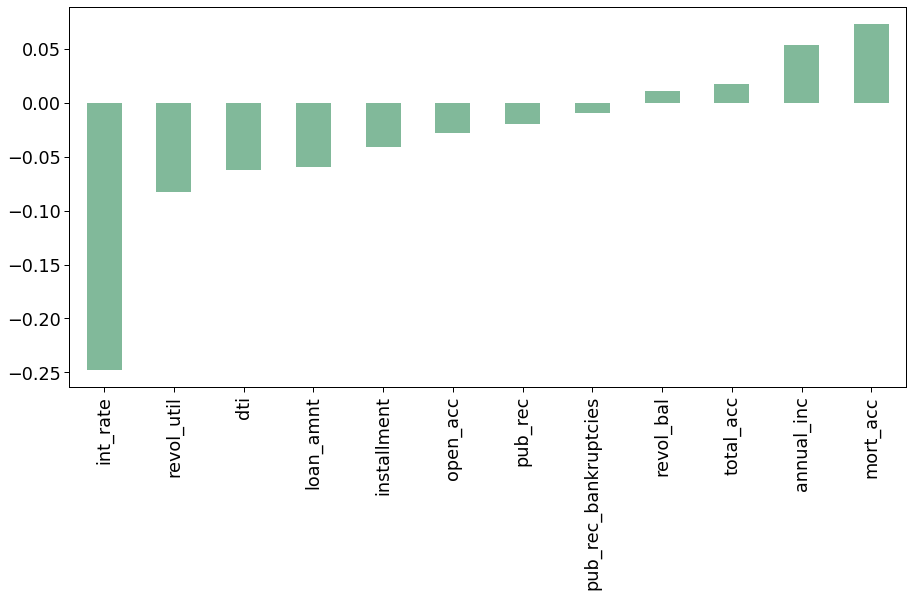

In [128]:
plt.figure(figsize=(15,7))
data.corr()["loan_repaid"].sort_values().drop("loan_repaid").plot(kind="bar", color="seagreen", alpha=0.6)

### Dealing with missing values. The number of features that have missing values is shown below. The number of missing values in each feature will determine the treatment of the feature; to drop or replace it with some other values. 

In [129]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [130]:
data.isnull().sum() / len(data) * 100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789223
emp_length              4.621126
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443149
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543493
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [131]:
data["emp_title"].nunique()

173102

In [132]:
data["emp_title"].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173102, dtype: int64

### The employment title feature has >15000 unique values. It is not feasible to keep them as a feature to be used in our machine learning model. We can drop it. 

In [133]:
data = data.drop("emp_title", axis=1)

In [134]:
sorted(data["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [135]:
sorted_emp_length = ['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years']

### Visualizing the employment length feature. It appears that most of the borrowers have >10yrs employment length, meaning most of the borrowers are middle-aged adults and/or matured instead of young adults. 

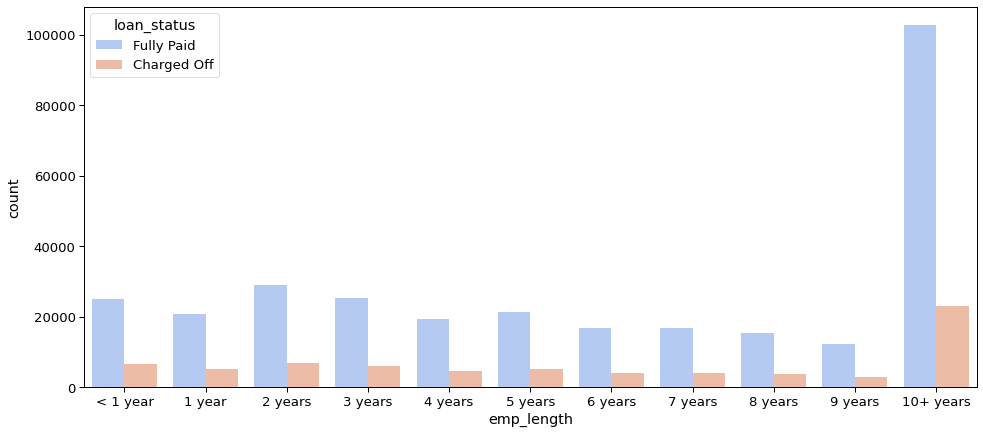

In [136]:
plt.figure(figsize=(16,7))
sns.set_context("paper", font_scale=1.5)
sns.countplot(x="emp_length", data=data, hue="loan_status", order=sorted_emp_length, palette="coolwarm")

In [137]:
emp_co = data[data["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]
emp_fp = data[data["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]

In [138]:
emp_length_graph = emp_co/(emp_co+emp_fp)

### Visualizing the number of charged off and total borrowers in percentage in each intervals of employment length. They are relatively the same across the board shown in the graph below.

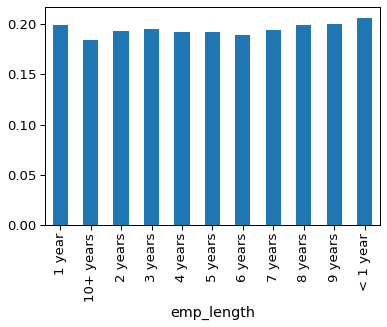

In [139]:
emp_length_graph.plot(kind="bar")

### The employment length feature does not really help us to distinguish borrowers who payoff or default. Will just drop. 

In [140]:
data = data.drop("emp_length", axis=1)

In [141]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [142]:
data["purpose"].value_counts()

debt_consolidation    234506
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

### Visualizing the loan purpose feature. It is apparent that top reason to borrow loans from Lending Club is debt consolidation as provided by borrowers. This is matches with common perception that people often attempt to pay off high interest rate credit card accounts with unsecured personal loan.

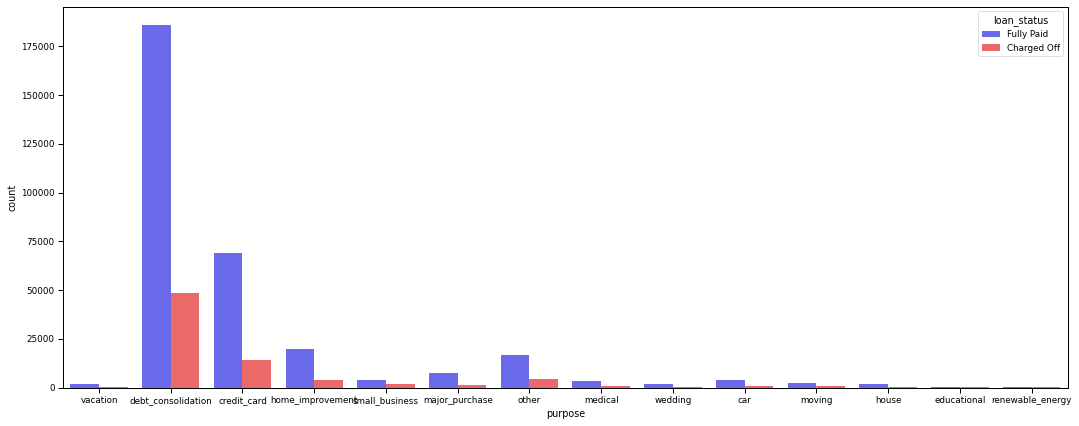

In [143]:
plt.figure(figsize=(18,7))
sns.set_context("paper", font_scale=1)
sns.countplot(x="purpose", data=data, hue="loan_status", palette="seismic")

In [144]:
data["title"].value_counts()

Debt consolidation            152471
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
 done                              1
PayOffHighIntCreditCards           1
Heat my home                       1
Graduation/Travel Expenses         1
Toxic Debt Payoff                  1
Name: title, Length: 48788, dtype: int64

### It appears that the feature "title" provides the same information as loan purpose. We can drop this feature. 

In [145]:
data = data.drop("title", axis=1)

In [146]:
data["mort_acc"].value_counts()

0.0     139776
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: mort_acc, dtype: int64

### Recalling that mortage account feature has ~38000 missing values. This is pretty significant as dropping this feature will significantly reduce the size of the dataset. It is probably a good idea to replace the missing values with some other values. After checking out the correlation of mortageg with other features, it is noted that total account has the highest correlation with mortgage account. it is not surprising that people have more mortgages when they have more accounts. 

In [147]:
data.corr()["mort_acc"].sort_values()

int_rate               -0.082585
dti                    -0.025438
revol_util              0.007518
pub_rec                 0.011552
pub_rec_bankruptcies    0.027238
loan_repaid             0.073113
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222314
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

### Decided to replace missing values in mortgage account with the mean value based on the total account. 

In [148]:
total_acc_avg = data.groupby("total_acc").mean()["mort_acc"]

In [149]:
def fill_in_mort_acc(total_acc, mort_acc):
    
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return(mort_acc)

### Replacing the missing values with lambda function. 

In [150]:
data["mort_acc"] = data.apply(lambda x: fill_in_mort_acc(x["total_acc"], x["mort_acc"]), axis=1)

### Finding out the current standing of our missing values. Since the remaining 2 features have very low missing values, decided to just drop those missing values as it is more time-saving. 

In [151]:
data.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [152]:
data = data.dropna()

In [153]:
data.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [154]:
data.dtypes

loan_amnt                 int64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
dti                     float64
earliest_cr_line         object
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
loan_repaid               int64
dtype: object

### Dealing with non-numeric type of data

In [155]:
data.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [156]:
data["term"].value_counts()

 36 months    301246
 60 months     93972
Name: term, dtype: int64

### Grabbing the numeric values "36" and "60".

In [157]:
data["term"] = data["term"].apply(lambda term: int(term[:3]))

In [158]:
data["term"].value_counts()

36    301246
60     93972
Name: term, dtype: int64

### Since sub-grade provides more information than grade, this featue will be dropped. 

In [159]:
data = data.drop("grade", axis=1)

### Preparing the data with binary classification (dummy data).

In [160]:
dummy = pd.get_dummies(data["sub_grade"], drop_first=True)

In [161]:
data = pd.concat([data.drop("sub_grade", axis=1), dummy], axis=1)

In [162]:
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-15,Fully Paid,vacation,...,0,0,0,0,0,0,0,0,0,0
1,8000,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-15,Fully Paid,debt_consolidation,...,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-15,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-14,Fully Paid,credit_card,...,0,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-13,Charged Off,credit_card,...,0,0,0,0,0,0,0,0,0,0


In [163]:
data["verification_status"].value_counts()

Verified           139451
Source Verified    131300
Not Verified       124467
Name: verification_status, dtype: int64

In [164]:
data["application_type"].value_counts()

INDIVIDUAL    394507
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [165]:
data["initial_list_status"].value_counts()

f    237345
w    157873
Name: initial_list_status, dtype: int64

In [166]:
dummy = pd.get_dummies(data[["verification_status", "application_type", "initial_list_status", "purpose"]], drop_first=True)
data = pd.concat([data.drop(["verification_status", "application_type", "initial_list_status", "purpose"], axis=1), dummy], axis=1)

In [167]:
data.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000,36,11.44,329.48,RENT,117000.0,Jan-15,Fully Paid,26.24,Jun-90,...,0,0,0,0,0,0,0,0,1,0
1,8000,36,11.99,265.68,MORTGAGE,65000.0,Jan-15,Fully Paid,22.05,Jul-04,...,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,RENT,43057.0,Jan-15,Fully Paid,12.79,Aug-07,...,0,0,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,RENT,54000.0,Nov-14,Fully Paid,2.60,Sep-06,...,0,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,MORTGAGE,55000.0,Apr-13,Charged Off,33.95,Mar-99,...,0,0,0,0,0,0,0,0,0,0


In [168]:
data["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159394
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [169]:
data["home_ownership"] = data["home_ownership"].replace(["NONE", "ANY"], "OTHER")

In [170]:
data["home_ownership"].value_counts()

MORTGAGE    198022
RENT        159394
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [171]:
dummy = pd.get_dummies(data["home_ownership"], drop_first=True)
data = pd.concat([data.drop("home_ownership", axis=1), dummy], axis=1)

In [172]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT
0,10000,36,11.44,329.48,117000.0,Jan-15,Fully Paid,26.24,Jun-90,16,...,0,0,0,0,0,1,0,0,0,1
1,8000,36,11.99,265.68,65000.0,Jan-15,Fully Paid,22.05,Jul-04,17,...,0,0,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,43057.0,Jan-15,Fully Paid,12.79,Aug-07,13,...,0,0,0,0,0,0,0,0,0,1
3,7200,36,6.49,220.65,54000.0,Nov-14,Fully Paid,2.60,Sep-06,6,...,0,0,0,0,0,0,0,0,0,1
4,24375,60,17.27,609.33,55000.0,Apr-13,Charged Off,33.95,Mar-99,13,...,0,0,0,0,0,0,0,0,0,0


##### Four more features with object as data type to deal with.

In [173]:
data.select_dtypes("object").columns

Index(['issue_d', 'loan_status', 'earliest_cr_line', 'address'], dtype='object')

In [174]:
data["address"].value_counts()

USCGC Smith\nFPO AE 70466                            8
USNS Johnson\nFPO AE 05113                           8
USS Johnson\nFPO AE 48052                            8
USS Smith\nFPO AP 70466                              8
USNS Johnson\nFPO AP 48052                           7
                                                    ..
43570 Maxwell Field Apt. 502\nEast John, NH 22690    1
9983 Turner Cove\nSouth Gregmouth, WV 70466          1
1312 Cody Shoal\nRalphfurt, CO 29597                 1
3841 Liu Crest\nClarkchester, NC 29597               1
787 Michelle Causeway\nBriannaton, AR 48052          1
Name: address, Length: 392897, dtype: int64

#### Address has no values in our machine learning model but the ZIP code may have some sort of influence in the outcome. Grabbing the ZIP code from the address. 

In [175]:
data["zip_code"] = data["address"].apply(lambda address: address[-5:])

In [176]:
data["zip_code"].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45299
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

#### Noted that the newly engineered feature of ZIP has only a few unique counts so it is feasible to keep this feature. Getting dummy data on this feature. 

In [177]:
dummy = pd.get_dummies(data["zip_code"], drop_first=True)
data = pd.concat([data.drop("zip_code", axis=1), dummy], axis=1)

In [178]:
data.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000,36,11.44,329.48,117000.0,Jan-15,Fully Paid,26.24,Jun-90,16,...,1,0,0,1,0,0,0,0,0,0
1,8000,36,11.99,265.68,65000.0,Jan-15,Fully Paid,22.05,Jul-04,17,...,0,1,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,43057.0,Jan-15,Fully Paid,12.79,Aug-07,13,...,1,1,0,0,0,0,0,0,0,0
3,7200,36,6.49,220.65,54000.0,Nov-14,Fully Paid,2.60,Sep-06,6,...,1,0,0,0,0,0,0,0,0,0
4,24375,60,17.27,609.33,55000.0,Apr-13,Charged Off,33.95,Mar-99,13,...,0,0,1,0,0,0,0,0,0,0


In [179]:
data = data.drop("address", axis=1)

In [180]:
data = data.drop("issue_d", axis=1)

In [181]:
data["earliest_cr_line"].value_counts()

Oct-00    3013
Aug-00    2930
Oct-01    2890
Aug-01    2879
Nov-00    2729
          ... 
Jul-55       1
Oct-50       1
May-58       1
Nov-55       1
Aug-59       1
Name: earliest_cr_line, Length: 684, dtype: int64

In [182]:
x = data["earliest_cr_line"].values

In [183]:
data["earliest_cr_line"] = data["earliest_cr_line"].apply(lambda year: year.replace('-', '-20') if int(year[-2:]) < 14 else year.replace('-', '-19'))

#### The feature "Earliest credit line" may be a key factor as it provides some sort of a time series information. Grabbing the year as our time series feature. 

In [184]:
data["earliest_cr_line"] = data["earliest_cr_line"].apply(lambda year: int(year[-4:]))

In [185]:
data["earliest_cr_line"].value_counts()

2000    29302
2001    29031
1999    26444
2002    25849
2003    23623
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

In [186]:
data.select_dtypes("object").columns

Index(['loan_status'], dtype='object')

#### Recalling that we have converted "fully paid" and "charged off" with binary digits, it is safe to just drop the original feature. 

In [187]:
data = data.drop("loan_status", axis=1)

#### Data cleansing process and feature-engineering complete. The dataset now has 79 features. Now preparing for training data and test data. 

In [188]:
data.head(3)

,loan_amnt,term,int_rate,installment,annual_inc,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000,36,11.44,329.48,117000.0,26.24,1990,16,0,36369,...,1,0,0,1,0,0,0,0,0,0
1,8000,36,11.99,265.68,65000.0,22.05,2004,17,0,20131,...,0,1,0,0,0,0,0,0,0,0
2,15600,36,10.49,506.97,43057.0,12.79,2007,13,0,11987,...,1,1,0,0,0,0,0,0,0,0


### Trainning data will be set at 80% of the dataset and test size is 20%. Random state will be set at 42, which is arbitrary.

#### The target feature or y-variable is "loan repaid" (yes = 1; no = 0). 

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X = data.drop("loan_repaid", axis=1).values
y = data["loan_repaid"].values


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Scalar is used when preparing the dataset for deep learning so the data will have a more meaningful relationship among features. This can enable the machine to learn the data better. 

In [192]:
from sklearn.preprocessing import MinMaxScaler

In [193]:
scaler = MinMaxScaler()

In [194]:
X_train = scaler.fit_transform(X_train)

In [195]:
X_test = scaler.transform(X_test)

### Preparation is complete. Importing deep neural network libraries. 

In [196]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

#### Recalling the dataset has ~300000 observations and 78 features. 

In [197]:
X_train.shape

(316174, 78)

#### Setting "rectified linear unit" as the activation function in neural network as this is a commonly used activation. Dense will be set at 78, which is an arbitrary number, as the first layer, then followed by half of it and so forth. On the final layer of the neural network, the "sigmoid" is used as the activation function, which is somewhat similar to logistic regression. For loss function, the binary cross entropy will be used since this is a binary classification model. Optimizer is set as Adam is this is the most commonly used. 

In [198]:
model = Sequential()

model.add(Dense(78, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19, activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam")

#### Setting epochs as 25, which is also an arbitrary number; the batch size is set at 256 (64-bit ~ personal preference).

In [199]:
model.fit(X_train, y_train, epochs=25, batch_size=256, validation_data=(X_test, y_test))

Epoch 1/25
1236/1236 [==============================] - 5s 3ms/step - loss: 0.2987 - val_loss: 0.2629
Epoch 2/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2663 - val_loss: 0.2627
Epoch 3/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2638 - val_loss: 0.2613
Epoch 4/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2623 - val_loss: 0.2603
Epoch 5/25
1236/1236 [==============================] - 5s 4ms/step - loss: 0.2614 - val_loss: 0.2602
Epoch 6/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2606 - val_loss: 0.2601
Epoch 7/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2605 - val_loss: 0.2602
Epoch 8/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2599 - val_loss: 0.2594
Epoch 9/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2597 - val_loss: 0.2596
Epoch 10/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.259

In [200]:
losses = pd.DataFrame(model.history.history)

#### Loss function graph to see the performance of the deep neural network model. Noted that the loss function decreased sharply at the beginning, which is desirable, then trending down slowly below the validation loss. 

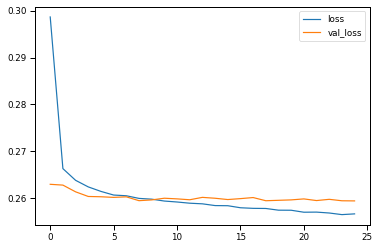

In [201]:
losses.plot()

### Evalution of the supervised machine learning deep neural network performance. 

In [202]:
from sklearn.metrics import classification_report, confusion_matrix

In [203]:
prediction = model.predict(X_test)

In [204]:
predictions = [1 if x > 0.5 else 0 for x in prediction]

In [205]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.45      0.61     15443
           1       0.88      0.99      0.93     63601

    accuracy                           0.89     79044
   macro avg       0.92      0.72      0.77     79044
weighted avg       0.90      0.89      0.87     79044

[[ 7002  8441]
 [  355 63246]]


## Noted that the recall value is 99% on 1s and precision at 95% on 0s. This model did not do so well in recall on 0s, only at 45%, which is pretty significant. The f1-score on 1 is 93%, which is pretty good. The overall accuracy yields 89%, which is much better than a random guess. 
## The deep neural network algorithm can be further optimized using Earlystopping and dropout. 